# Preparation

In [78]:
ntrain = 0 ; latent_dim = 15

time: 0 ns (started: 2023-02-12 08:01:32 +09:00)


In [79]:
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-02-12 08:01:32 +09:00)


In [80]:
import numpy as np
import math
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from numpy import savetxt
import pennylane as qml
import random

time: 0 ns (started: 2023-02-12 08:01:32 +09:00)


# Data

In [81]:
def data(ntrain, latent_dim):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0  # normalize the data
    x_train_filter = np.where(y_train == ntrain)
    x_test_filter = np.where(y_test == ntrain)

    X_train = x_train[x_train_filter]
    X_test = x_test[x_test_filter]
    Y_train = y_train[x_train_filter]
    Y_test = y_test[x_test_filter]

    X_train = tf.image.resize(X_train[:], (256, 1)).numpy()
    X_test = tf.image.resize(X_test[:], (256, 1)).numpy()
    X_train, X_test = tf.squeeze(X_train).numpy(), tf.squeeze(X_test).numpy()
    
    x_train = tf.image.resize(x_train[:], (256, 1)).numpy()
    x_test = tf.image.resize(x_test[:], (256, 1)).numpy()
    x_train, x_test = tf.squeeze(x_train).numpy(), tf.squeeze(x_test).numpy()
    
    center = qml.numpy.zeros(latent_dim, requires_grad=True)
    center_train = np.tile(center,(len(X_train),1))

    return x_train, y_train, x_test, y_test, X_train, X_test, Y_train, Y_test, center_train
    print('x_train:',x_train.shape)
    print('x_test:',x_test.shape)
    print('X_train:',X_train.shape)
    print('X_test:',X_test.shape)

time: 0 ns (started: 2023-02-12 08:01:33 +09:00)


In [82]:
x_train, y_train, x_test, y_test, X_train, X_test, Y_train, Y_test, center_train = data(ntrain, latent_dim)

time: 391 ms (started: 2023-02-12 08:01:33 +09:00)


# Training

In [83]:
import os

# Change the current working directory to the desired directory
os.chdir('C:/Users/user1/Quantum/qsvdd_real')

%run ./code/Angular_hybrid.py
%run ./code/unitary.py
%run ./code/embedding.py
%run ./code/QCNN_circuit.py
%run ./code/Training.py

time: 0 ns (started: 2023-02-12 08:01:33 +09:00)


In [84]:
train_Xdata = X_train
train_Ydata = center_train
conv_filter = 'U_SU4_no_pooling'
# parameter_weights = np.zeros(15)
num_params_conv = 15
data_encoding = 'Amplitude'
circuit_type = 'QCNN'
cost_func = 'svdd'
measure_basis = 'Z'

loss_history, est_params, param_history = circuit_training(X_train=train_Xdata,
                                            Y_train=train_Ydata,
                                            U=conv_filter,
                                            U_params=num_params_conv,
                                            embedding_type=data_encoding,
                                            circuit=circuit_type,
                                            latent_dim = latent_dim,
                                            cost_fn=cost_func,
                                            measure_axis=measure_basis)

C:\Users\user1\anaconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:698: ComplexWarning: Casting complex values to real discards the imaginary part
  onp.add.at(A, idx, x)


iteration:  0  cost:  0.20987880363128664
iteration:  5  cost:  0.1825522302703774
iteration:  10  cost:  0.17886181755283995
iteration:  15  cost:  0.1699119057884451
iteration:  20  cost:  0.15289675285237925
iteration:  25  cost:  0.11817197948827728
iteration:  30  cost:  0.1248309553274284
iteration:  35  cost:  0.09294741524823774
iteration:  40  cost:  0.08452322702208254
iteration:  45  cost:  0.06830913784574949
iteration:  50  cost:  0.08335054813654075
iteration:  55  cost:  0.06462695899057007
iteration:  60  cost:  0.06416670489779103
iteration:  65  cost:  0.05778166775232949
iteration:  70  cost:  0.0463221696877479
iteration:  75  cost:  0.05960941472934247
iteration:  80  cost:  0.04604852832062951
iteration:  85  cost:  0.048678226364004096
iteration:  90  cost:  0.052061720850530686
iteration:  95  cost:  0.04599112007656445
iteration:  100  cost:  0.03954709192809818
iteration:  105  cost:  0.050929116429875174
iteration:  110  cost:  0.03777775393415847
iteration: 

In [85]:
# from pennylane import numpy as np
# est_params = np.random.randn(45, requires_grad = True)
est_params

tensor([ 0.7278782 ,  0.59980642, -1.12309164, -0.28229146, -1.0955428 ,
         1.65111455, -0.03347722, -0.74122439,  0.24542375,  1.49341297,
        -0.65666405,  0.42008849,  0.88711679,  0.66050691,  1.71774623,
         1.15938185, -1.78616947,  1.18193508, -1.05300664,  0.20627342,
        -0.81827423,  0.29537808,  0.56080733,  1.57424321, -0.63005794,
         1.41470242, -2.15557233, -0.66060211,  0.53401561,  0.4309705 ,
         1.47505773, -0.99652169, -0.01981175,  0.18543383, -0.52391107,
        -1.27243308, -0.77581969,  0.69261612, -1.1341061 , -2.05707867,
        -0.11959436, -0.62757657, -0.11540471, -1.07148765,  0.75855103,
        -0.9138418 ,  0.93542391,  0.63400151,  0.95972759,  1.62522147,
        -2.267441  ,  0.98149403, -0.63986634, -1.13309692,  0.46494522,
         1.33862424,  0.43482558, -0.92633611, -0.02163126,  0.12680871,
         0.63858262,  1.28759801,  0.09622574,  1.13054129,  0.94896905,
         1.08327077,  0.79762813,  0.22673034,  0.5

time: 0 ns (started: 2023-02-12 12:00:33 +09:00)


Text(0.5, 1.0, 'Loss convergence')

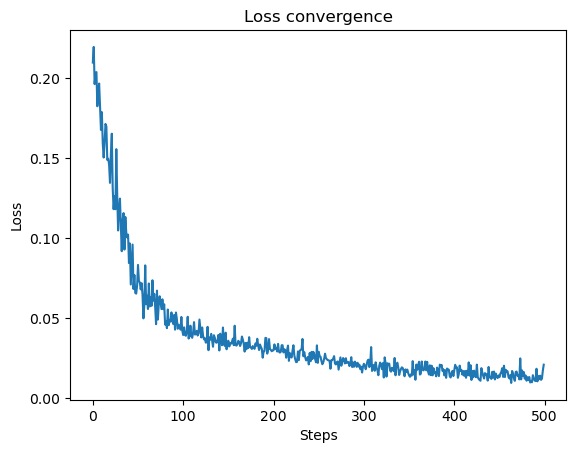

time: 78 ms (started: 2023-02-12 12:00:33 +09:00)


In [86]:
plt.plot(loss_history)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Loss convergence")

# plt.savefig('./img/OCC0/qsvdd/cost_qcnn.png')

In [87]:
# savetxt('./img/OCC0/qsvdd/param_list_qcnn',est_params.numpy(),delimiter=',')

time: 0 ns (started: 2023-02-12 12:00:33 +09:00)


Text(0.5, 1.0, 'Parameter convergence')

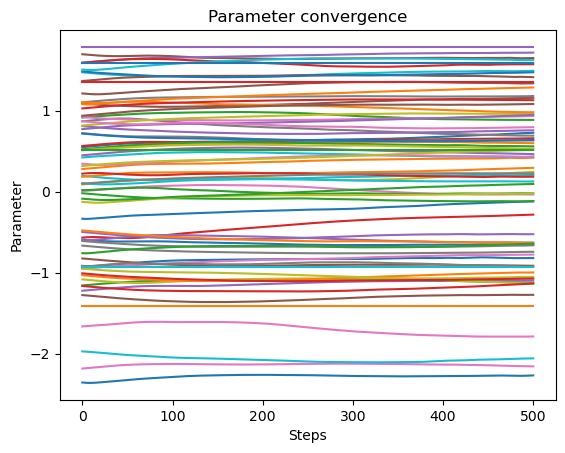

time: 93 ms (started: 2023-02-12 12:00:33 +09:00)


In [88]:
plt.plot(param_history)
plt.xlabel("Steps")
plt.ylabel("Parameter")
plt.title("Parameter convergence")
# plt.savefig('./img/OCC0/qsvdd/parameters_qcnn.png')

# test

In [91]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def radius(data, center):
    res = []
    for j in range(len(data)):
        res.append(sum(abs(data - center)[j]**2))
    return res
        

time: 0 ns (started: 2023-02-12 12:00:35 +09:00)


In [92]:
import numpy as np
trained_params = est_params
conv_filter = 'U_SU4_no_pooling'
num_params_conv = 15
data_encoding = 'Amplitude'
cost_func = 'svdd'
meaasure_basis = 'Z'
radius_nor = []
radius_ano = []


def test(ntrain):
    for i in range(10):
        if i == ntrain:
            filter = np.where(y_test == ntrain)
            test_data = x_test[filter]
            test_label = y_test[filter]

            pred = np.asarray([QCNN_circuit.QCNN(x, trained_params, U=conv_filter, U_params=num_params_conv, 
                                                 embedding_type=data_encoding, latent_dim = latent_dim, 
                                                 cost_fn=cost_func, measure_axis=meaasure_basis) for x in test_data])

            for j in range(pred.shape[0]):
                sample = pred[j,:]
                radius_nor.append(radius(data = sample, center = center_train)[0].numpy())     

        else:
            filter = np.where(y_test == i)
            test_data = x_test[filter]
            idx_test = random.sample(range(len(test_data)),100)
            test_data = test_data[idx_test]

            pred = np.asarray([QCNN_circuit.QCNN(x, trained_params, U=conv_filter, U_params=num_params_conv, 
                                                 embedding_type=data_encoding, latent_dim = latent_dim, 
                                                 cost_fn=cost_func, measure_axis=meaasure_basis) for x in test_data])
            for j in range(pred.shape[0]):
                sample = pred[j,:]
                radius_ano.append(radius(data = sample, center = center_train)[0].numpy())     

    y_pred_nor = radius_nor
    y_true_nor = np.zeros(len(radius_nor), dtype=int)
    y_pred_ano = radius_ano
    y_true_ano = np.ones(len(radius_ano), dtype=int)

    y_pred = np.concatenate((y_pred_nor,y_pred_ano),axis=None)
    y_true = np.concatenate((y_true_nor,y_true_ano),axis=None)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true,y_pred)
    
    return auc, y_pred, y_true, fpr, tpr

time: 15 ms (started: 2023-02-12 12:00:35 +09:00)


## AUC

In [93]:
auc, y_pred, y_true, fpr, tpr = test(ntrain)

time: 16min 6s (started: 2023-02-12 12:00:35 +09:00)


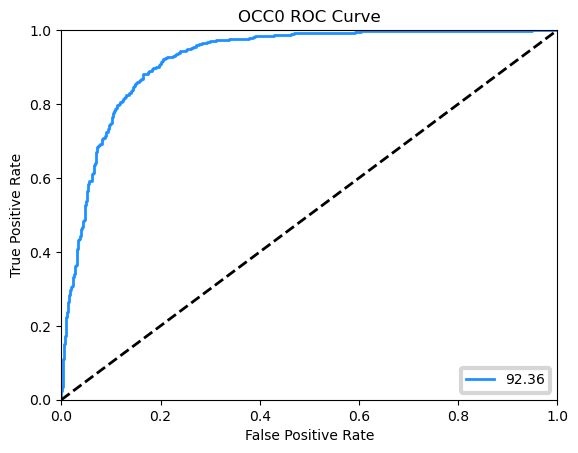

time: 47 ms (started: 2023-02-12 12:16:41 +09:00)


In [94]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='dodgerblue',lw=lw,label="{:.2f}".format(auc * 100))
plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("OCC0 ROC Curve")
plt.legend(loc="lower right")
# plt.savefig('./img/OCC0/qsvdd/OCC0_ROC_all.png')
plt.show()

In [95]:
import os

def save_auc_to_file(auc, file_name):
    auc = "{:.2f}".format(auc * 100)
    directory = os.path.dirname(file_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    if not os.path.exists(file_name):
        with open(file_name, 'w') as f:
            f.write("AUC Results\n")
    with open(file_name, 'a') as f:
        f.write(str(auc) + "\n")

# Example usage
save_auc_to_file(auc, "./result/auc_results0.txt")

time: 0 ns (started: 2023-02-12 12:16:41 +09:00)


In [96]:
print("{:.2f}".format(auc * 100))

92.36
time: 0 ns (started: 2023-02-12 12:16:41 +09:00)
